In [ ]:
# Import all required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Upload and Read the Food Nutritional Facts Dataset
uploaded = files.upload()
df_new = pd.read_csv('foodstruct_nutritional_facts.csv')
print(df_new.columns.tolist())

Saving foodstruct_nutritional_facts.csv to foodstruct_nutritional_facts (1).csv
['Food Name', 'Category Name', 'Calcium', 'Calories', 'Carbs', 'Cholesterol', 'Copper', 'Fats', 'Fiber', 'Folate', 'Iron', 'Magnesium', 'Monounsaturated Fat', 'Net carbs', 'Omega-3 - DHA', 'Omega-3 - DPA', 'Omega-3 - EPA', 'Phosphorus', 'Polyunsaturated fat', 'Potassium', 'Protein', 'Saturated Fat', 'Selenium', 'Sodium', 'Trans Fat', 'Vitamin A (IU)', 'Vitamin A RAE', 'Vitamin B1', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Zinc', 'Choline', 'Fructose', 'Histidine', 'Isoleucine', 'Leucine', 'Lysine', 'Manganese', 'Methionine', 'Phenylalanine', 'Starch', 'Sugar', 'Threonine', 'Tryptophan', 'Valine', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Omega-3 - ALA', 'Omega-6 - Eicosadienoic acid', 'Omega-6 - Gamma-linoleic acid', 'Omega-3 - Eicosatrienoic acid', 'Omega-6 - Dihomo-gamma-linoleic acid', 'Omega-6 - Linoleic acid', 'Omega-6 - Arachidonic acid']


In [ ]:
# Mapping for column renaming
rename_mapping = {
    'Food Name': 'food',
    'Category Name': 'food_type',
    'Calories': 'Caloric Value',
    'Fats': 'Fat',
    'Saturated Fat': 'Saturated Fats',
    'Monounsaturated Fat': 'Monounsaturated Fats',
    'Polyunsaturated fat': 'Polyunsaturated Fats',
    'Carbs': 'Carbohydrates',
    'Sugar': 'Sugars',
    'Fiber': 'Dietary Fiber',
    'Cholesterol': 'Cholesterol',
    'Sodium': 'Sodium',
    'Water': 'Water',
    'Vitamin A (IU)': 'Vitamin A',
    'Vitamin B1': 'Vitamin B1',
    'Vitamin B2': 'Vitamin B2',
    'Vitamin B3': 'Vitamin B3',
    'Vitamin B5': 'Vitamin B5',
    'Vitamin B6': 'Vitamin B6',
    'Vitamin B12': 'Vitamin B12',
    'Vitamin C': 'Vitamin C',
    'Vitamin D': 'Vitamin D',
    'Vitamin E': 'Vitamin E',
    'Vitamin K': 'Vitamin K',
    'Calcium': 'Calcium',
    'Copper': 'Copper',
    'Magnesium': 'Magnesium',
    'Manganese': 'Manganese',
    'Phosphorus': 'Phosphorus',
    'Potassium': 'Potassium',
    'Selenium': 'Selenium',
    'Zinc': 'Zinc',
    'Folate': 'Vitamin B11'
}

df_new.rename(columns=rename_mapping, inplace=True)
print(df_new.columns.tolist())

['food', 'food_type', 'Calcium', 'Caloric Value', 'Carbohydrates', 'Cholesterol', 'Copper', 'Fat', 'Dietary Fiber', 'Vitamin B11', 'Iron', 'Magnesium', 'Monounsaturated Fats', 'Net carbs', 'Omega-3 - DHA', 'Omega-3 - DPA', 'Omega-3 - EPA', 'Phosphorus', 'Polyunsaturated Fats', 'Potassium', 'Protein', 'Saturated Fats', 'Selenium', 'Sodium', 'Trans Fat', 'Vitamin A', 'Vitamin A RAE', 'Vitamin B1', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Zinc', 'Choline', 'Fructose', 'Histidine', 'Isoleucine', 'Leucine', 'Lysine', 'Manganese', 'Methionine', 'Phenylalanine', 'Starch', 'Sugars', 'Threonine', 'Tryptophan', 'Valine', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Omega-3 - ALA', 'Omega-6 - Eicosadienoic acid', 'Omega-6 - Gamma-linoleic acid', 'Omega-3 - Eicosatrienoic acid', 'Omega-6 - Dihomo-gamma-linoleic acid', 'Omega-6 - Linoleic acid', 'Omega-6 - Arachidonic acid']


In [ ]:
# List of columns to keep
columns_to_keep = [
    'food', 'Caloric Value', 'Fat', 'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats',
    'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium',
    'Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3',
    'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K',
    'Calcium', 'Iron', 'Copper', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Zinc', 'food_type'
]

df_new = df_new[columns_to_keep]
print(f"✅ Dataset after filtering has {df_new.shape[0]} rows and {df_new.shape[1]} columns.")
print(df_new.head())

✅ Dataset after filtering has 1157 rows and 34 columns.
          food  Caloric Value    Fat  Saturated Fats  Monounsaturated Fats  \
0      Acerola             32   0.30            0.07                  0.08   
1        Apple             52   0.17            0.03                  0.01   
2      Apricot             48   0.39            0.03                  0.17   
3  Dried fruit            241   0.51            0.02                  0.07   
4      Avocado            160  15.00            2.10                  9.80   

   Polyunsaturated Fats  Carbohydrates  Sugars  Protein  Dietary Fiber  ...  \
0                  0.09            7.7     NaN     0.40            1.1  ...   
1                  0.05           14.0   10.00     0.26            2.4  ...   
2                  0.08           11.0    9.20     1.40            2.0  ...   
3                  0.07           63.0   53.00     3.40            7.3  ...   
4                  1.80            8.5    0.66     2.00            6.7  ...   



In [ ]:
# Create a copy of dataframe for unit conversion
df_new_converted = df_new.copy()

# Groups of columns for conversion
columns_grams_to_mg = [
    'Fat', 'Saturated Fats', 'Cholesterol', 'Monounsaturated Fats', 'Polyunsaturated Fats',
    'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber',
    'Sodium', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3',
    'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K',
    'Calcium', 'Iron', 'Copper', 'Magnesium', 'Manganese', 'Phosphorus',
    'Potassium', 'Selenium', 'Zinc'
]

columns_IU_to_mg = ['Vitamin A']

# Convert from g to mg
for col in columns_grams_to_mg:
    if col in df_new_converted.columns:
        df_new_converted[col] = pd.to_numeric(df_new_converted[col], errors='coerce') * 1000

# Convert from IU to mg (Vitamin A)
for col in columns_IU_to_mg:
    if col in df_new_converted.columns:
        df_new_converted[col] = pd.to_numeric(df_new_converted[col], errors='coerce') * 0.0003

# Ensure Caloric Value remains unchanged
df_new_converted['Caloric Value'] = pd.to_numeric(df_new_converted['Caloric Value'], errors='coerce')
print("Unit conversion complete!")

Unit conversion complete!


In [ ]:
# Upload and Read the User History Dataset
uploaded = files.upload()
df = pd.read_csv('daily_food_nutrition_dataset.csv')
print(df.columns.tolist())

Saving daily_food_nutrition_dataset.csv to daily_food_nutrition_dataset.csv
['Date', 'User_ID', 'Food_Item', 'Category', 'Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)', 'Fiber (g)', 'Sugars (g)', 'Sodium (mg)', 'Cholesterol (mg)', 'Meal_Type', 'Water_Intake (ml)']


In [ ]:
# Rename Category column in User History Dataset
df = df.rename(columns={'Category': 'food_type'})
print(df.columns.tolist())

['Date', 'User_ID', 'Food_Item', 'food_type', 'Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)', 'Fiber (g)', 'Sugars (g)', 'Sodium (mg)', 'Cholesterol (mg)', 'Meal_Type', 'Water_Intake (ml)']


In [ ]:
# Filter User History Dataset
columns_to_keep_user_history = ['Date', 'User_ID', 'food_type', 'Meal_Type']
df = df[columns_to_keep_user_history]
print(f"✅ User history dataset after filtering has {df.shape[0]} rows and {df.shape[1]} columns.")
print(df.head())

✅ User history dataset after filtering has 10000 rows and 4 columns.
         Date  User_ID food_type  Meal_Type
0  2024-09-11      496      Meat      Lunch
1  2024-12-17      201    Fruits      Lunch
2  2024-06-09      776      Meat  Breakfast
3  2024-08-27      112    Fruits      Snack
4  2024-07-28      622    Fruits      Lunch


In [ ]:
# Print unique food_types from both datasets
print("📋 Food types in user history dataset:")
print(df['food_type'].unique())
print("\n📋 Food types in food nutrition dataset:")
print(df_new_converted['food_type'].unique())

📋 Food types in user history dataset:
['Meat' 'Fruits' 'Grains' 'Vegetables' 'Snacks' 'Beverages' 'Dairy']

📋 Food types in food nutrition dataset:
['Fruits' 'Vegetables' 'Seafood' 'Dairy' 'Mushrooms' 'Grains' 'Meat'
 'Spices' 'Nuts' 'Greens' 'Sweets' 'Oils and Sauces' 'Beverages' 'Soups'
 'Baked Products' 'Fast Foods' 'Meals, Entrees, and Side Dishes' 'Snacks'
 'Baby Foods']


In [ ]:
# Mapping for food_type standardization
mapping_food_type = {
    'Mushrooms': 'Vegetables',
    'Greens': 'Vegetables',
    'Seafood': 'Meat',
    'Spices': 'Grains',
    'Nuts': 'Grains',
    'Baked Products': 'Grains',
    'Sweets': 'Snacks'
}

# Apply the mapping
df_new_converted['food_type'] = df_new_converted['food_type'].replace(mapping_food_type)
print("📋 Food types in food nutrition dataset after mapping:")
print(df_new_converted['food_type'].unique())

📋 Food types in food nutrition dataset after mapping:
['Fruits' 'Vegetables' 'Meat' 'Dairy' 'Grains' 'Snacks' 'Oils and Sauces'
 'Beverages' 'Soups' 'Fast Foods' 'Meals, Entrees, and Side Dishes'
 'Baby Foods']


In [ ]:
# List of valid food_types from user history
valid_food_types = ['Meat', 'Fruits', 'Grains', 'Vegetables', 'Snacks', 'Beverages', 'Dairy']

# Filter food nutrition dataset
df_new_converted = df_new_converted[df_new_converted['food_type'].isin(valid_food_types)].reset_index(drop=True)
print("Food types after filtering:")
print(df_new_converted['food_type'].unique())
print(f"Number of food items remaining: {len(df_new_converted)}")

Food types after filtering:
['Fruits' 'Vegetables' 'Meat' 'Dairy' 'Grains' 'Snacks' 'Beverages']
Number of food items remaining: 932


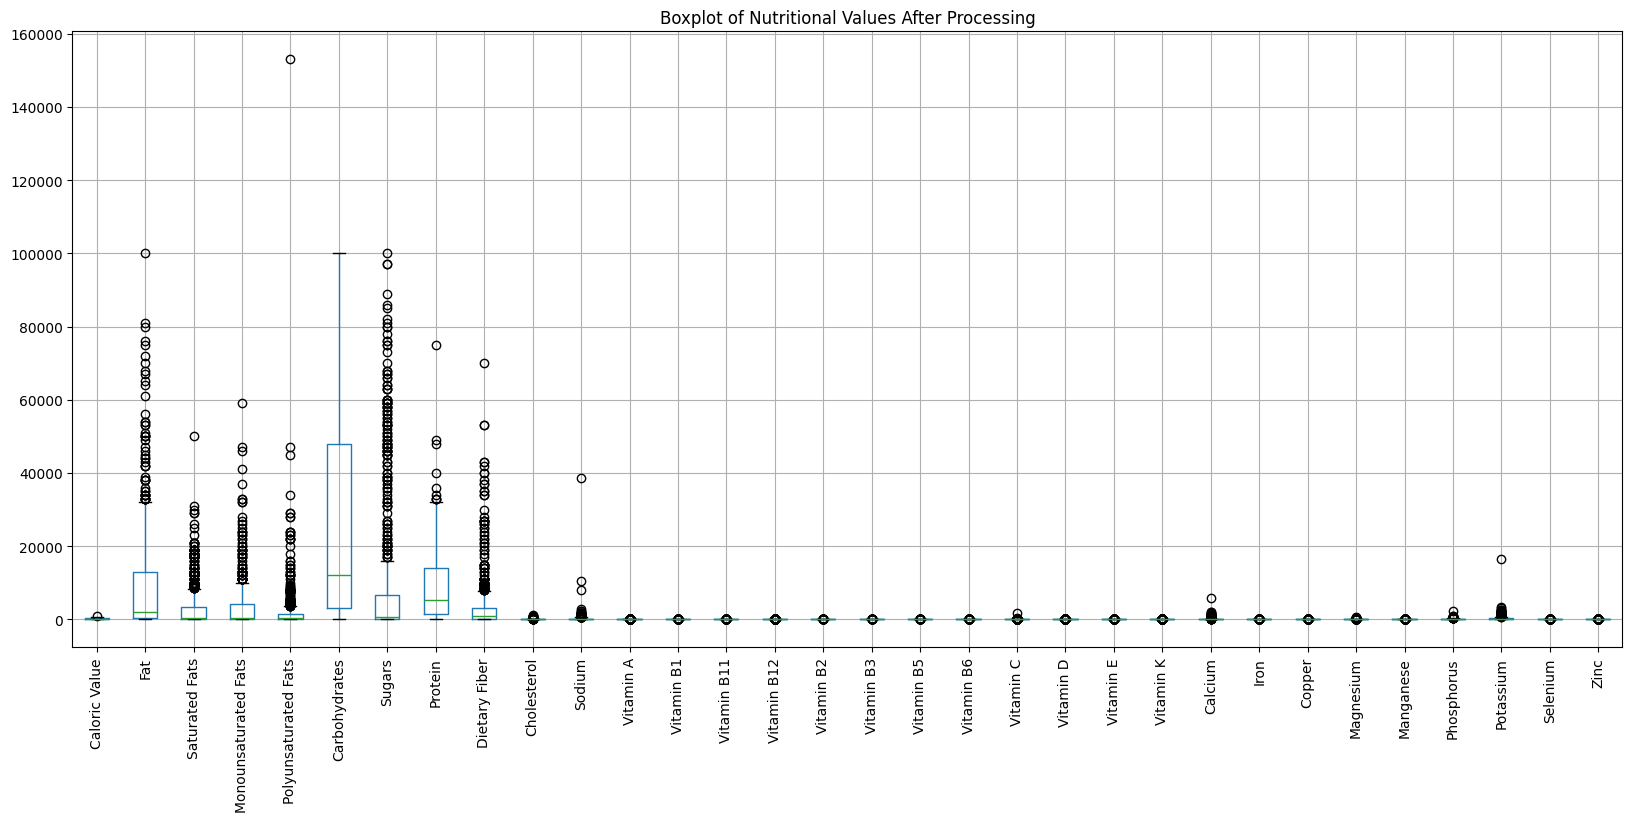

In [ ]:
# Fill NA values with 0
df_new_converted.fillna(0, inplace=True)

# Convert all numeric columns to float64
for col in df_new_converted.columns:
    if df_new_converted[col].dtype in ['int64', 'object', 'float32', 'float16']:
        try:
            df_new_converted[col] = df_new_converted[col].astype(float)
        except:
            pass

# Create boxplot of nutritional values
numeric_cols = df_new_converted.select_dtypes(include=['float64']).columns
plt.figure(figsize=(20, 8))
df_new_converted[numeric_cols].boxplot(rot=90)
plt.title("Boxplot of Nutritional Values After Processing")
plt.show()

In [ ]:
# Nutrition limits by age group
nutrition_general_limits = {
    'Caloric Value': {'child': 1800, 'adult': 3300},
    'Fat': {'child': 70000, 'adult': 128333.33},
    'Polyunsaturated Fats': {'child': 3000, 'adult': 3000},
    'Carbohydrates': {'child': 292500, 'adult': 536250},
    'Sugars': {'child': 45000, 'adult': 82500},
    'Protein': {'child': 27000, 'adult': 71000},
    'Dietary Fiber': {'child': 13000, 'adult': 30000},
    'Sodium': {'child': 1500, 'adult': 2000},
    'Vitamin A': {'child': 900, 'adult': 3000},
    'Vitamin B1': {'child': 0.7, 'adult': 1.4},
    'Vitamin B11': {'child': 0.4, 'adult': 1},
    'Vitamin B12': {'child': 0.0015, 'adult': 0.003},
    'Vitamin B2': {'child': 0.7, 'adult': 1.7},
    'Vitamin B3': {'child': 12, 'adult': 16},
    'Vitamin B5': {'child': 4, 'adult': 5},
    'Vitamin B6': {'child': 0.9, 'adult': 1.7},
    'Vitamin C': {'child': 50, 'adult': 100},
    'Vitamin D': {'child': 0.05, 'adult': 0.1},
    'Vitamin E': {'child': 100, 'adult': 300},
    'Vitamin K': {'child': 0.06, 'adult': 0.12},
    'Calcium': {'child': 1000, 'adult': 2500},
    'Iron': {'child': 10, 'adult': 18},
    'Copper': {'child': 0.7, 'adult': 0.9},
    'Magnesium': {'child': 200, 'adult': 420},
    'Manganese': {'child': 1.5, 'adult': 2.3},
    'Phosphorus': {'child': 800, 'adult': 1250},
    'Potassium': {'child': 2600, 'adult': 4700},
    'Zinc': {'child': 12, 'adult': 40}
}

# Function to check if a food item is safe for a specific age group
def is_safe(food_row, age_group):
    for nutrient, limits in nutrition_general_limits.items():
        if nutrient in food_row:
            value = food_row[nutrient]
            limit = limits[age_group]
            if value > limit:
                return False
    return True

# Apply safety check for each food item
safe_child = df_new_converted[df_new_converted.apply(lambda row: is_safe(row, 'child'), axis=1)]
safe_adult = df_new_converted[df_new_converted.apply(lambda row: is_safe(row, 'adult'), axis=1)]

safe_child_count = len(safe_child)
safe_adult_count = len(safe_adult)

# Categorize by food_type
safe_child_food_type_counts = safe_child['food_type'].value_counts()
safe_adult_food_type_counts = safe_adult['food_type'].value_counts()

print(f"Number of safe foods for CHILDREN: {safe_child_count}")
print(f"Distribution by type (CHILDREN):\n{safe_child_food_type_counts}\n")
print(f"Number of safe foods for ADULTS: {safe_adult_count}")
print(f"Distribution by type (ADULTS):\n{safe_adult_food_type_counts}")

Number of safe foods for CHILDREN: 452
Distribution by type (CHILDREN):
food_type
Grains        110
Vegetables     92
Beverages      77
Fruits         67
Meat           44
Dairy          35
Snacks         27
Name: count, dtype: int64

Number of safe foods for ADULTS: 652
Distribution by type (ADULTS):
food_type
Grains        127
Meat          116
Vegetables    111
Fruits         85
Beverages      81
Snacks         80
Dairy          52
Name: count, dtype: int64


In [ ]:
# Save cleaned datasets
df_new_converted.to_csv('food_nutrition.csv', index=False)
df.to_csv('user_history.csv', index=False)
files.download('food_nutrition.csv')
files.download('user_history.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

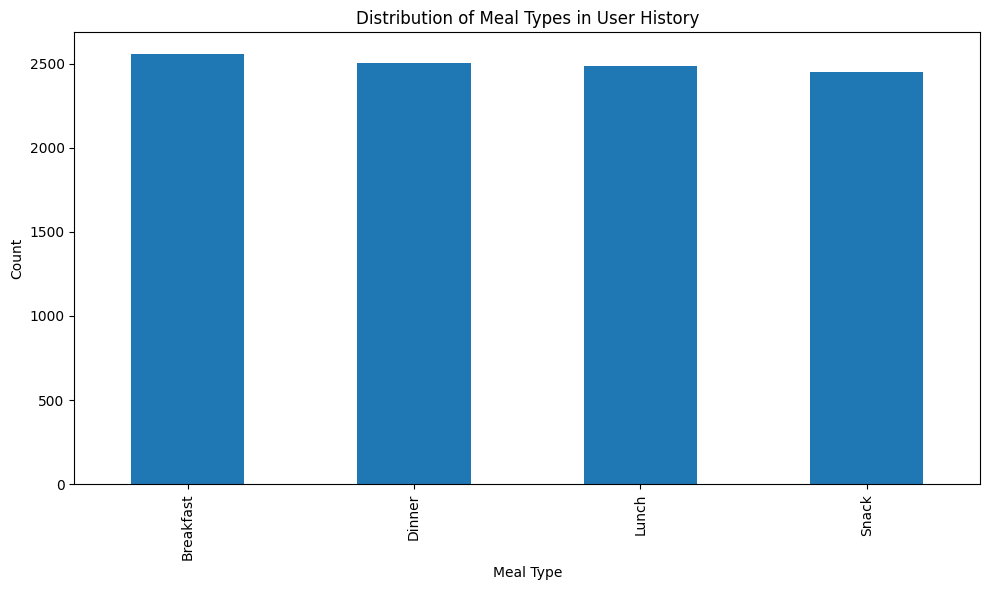

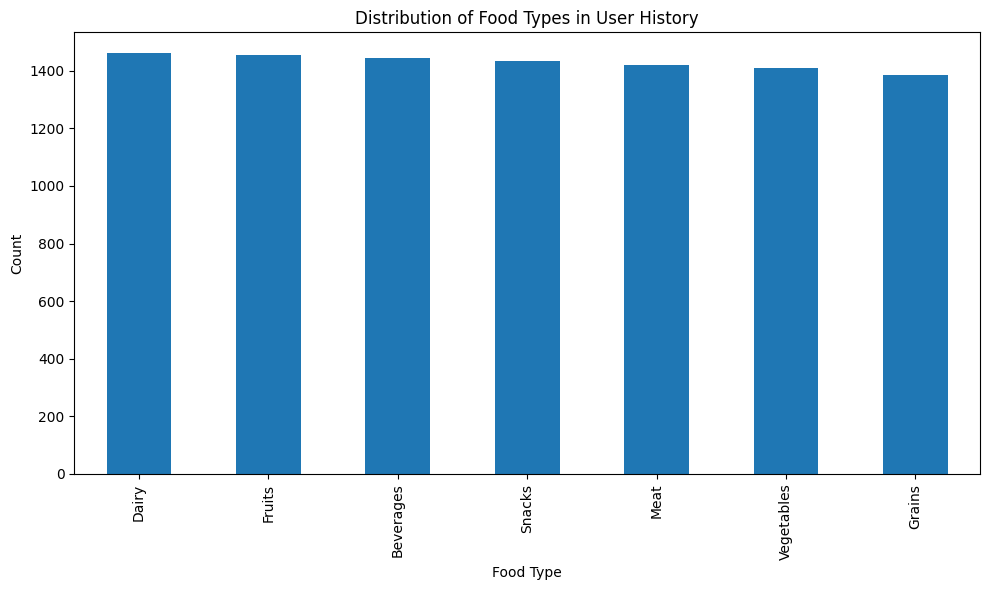

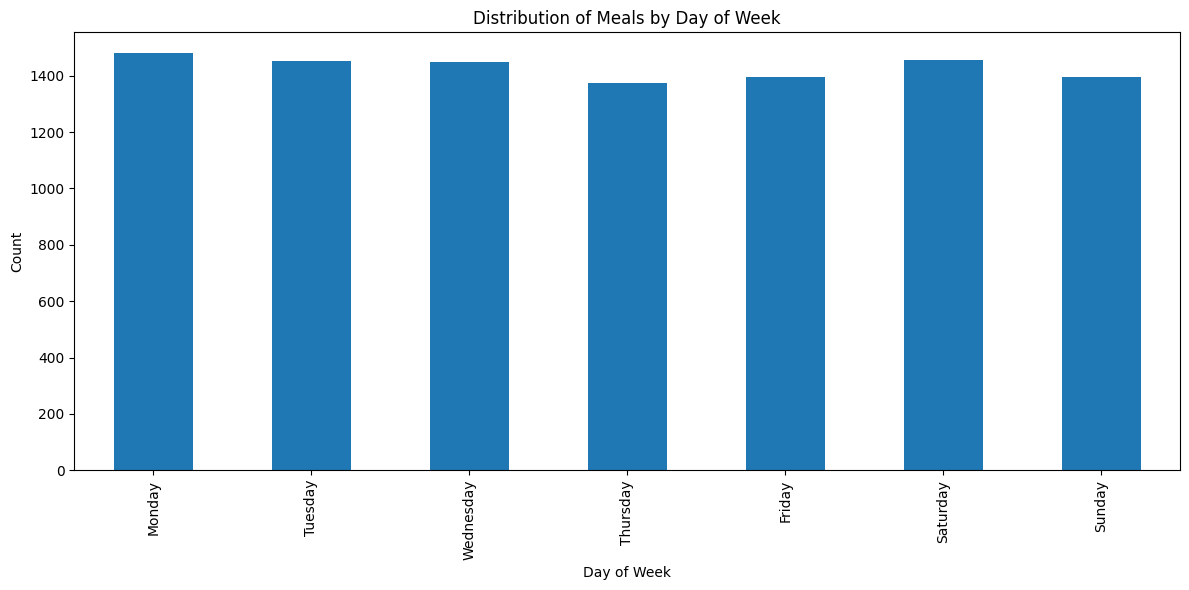

In [ ]:
# User history analysis visualizations
meal_type_counts = df['Meal_Type'].value_counts()
plt.figure(figsize=(10, 6))
meal_type_counts.plot(kind='bar')
plt.title('Distribution of Meal Types in User History')
plt.ylabel('Count')
plt.xlabel('Meal Type')
plt.tight_layout()
plt.show()

food_type_counts = df['food_type'].value_counts()
plt.figure(figsize=(10, 6))
food_type_counts.plot(kind='bar')
plt.title('Distribution of Food Types in User History')
plt.ylabel('Count')
plt.xlabel('Food Type')
plt.tight_layout()
plt.show()

# Analyze meals by day of week
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['Day_of_Week'].value_counts().reindex(day_order)

plt.figure(figsize=(12, 6))
day_counts.plot(kind='bar')
plt.title('Distribution of Meals by Day of Week')
plt.ylabel('Count')
plt.xlabel('Day of Week')
plt.tight_layout()
plt.show()